## Final Assignment

#### Imports

In [76]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
import datetime


#### 2. Get the data

The following dataset is a combination of many sets from different sources found online, as it was difficult to find one dataset that would be comprehensive enough for the scale of the assignment. After a thorough research, we asked ChatGPT to combine all the information into one table and group it based on the Holmes typology. In case of missing data, certain values were added manually.

In [47]:
# Loading the data
df = pd.read_excel('SerialKiller_Dataset.xlsx')
df

,Name,Birthday,Countries Active,Years Active,Proven Victims,Possible Victims,BirthYear,StartYear,Age At The Start of Killing,Notes,Type,Nickname,Reason,Archetype/Classification,Gender,Victim Age,Victim Gender,Targeted Group Type
0,Ray Copeland,12/30/1914,United States,1986-1989,5,12,1914.0,1986.0,72.0,Ray Copeland is an American serial killer who ...,Unknown,NaN,Power,Power/Control,Male,Adult,Mixed,NaN
1,Faye Copeland,1921-04-08 00:00:00,United States,1986-1989,5,12,1921.0,1986.0,65.0,Faye Copeland (born Faye Della Wilson) is an A...,Unknown,NaN,Power,Power/Control,Female,Adult,Mixed,NaN
2,Salvatore Perrone,11/22/1948,United States,2012,3,3,1948.0,2012.0,64.0,A failing business owner and former door-to-do...,Unknown,"The Son of Sal, John Doe Duffel Bags_x000D_\n",Power,Power/Control,Male,Adult,Male,NaN
3,Viktor Fokin,2/19/1935,Russia,1996-2000,9,10+,1935.0,1996.0,61.0,"Pensioner who lured, killed and then dismember...",Hate Crime,Grandfather Ripper,Hate Crime,Mission-Oriented (Hate-Crime/Targeted Groups),Male,Adult,Female,NaN
4,Andr??Â?s P??Â?ndy,1927-01-06 00:00:00,Belgium,1986-1990,6,14+,1927.0,1986.0,59.0,"Former clergyman, killed his two wives and fou...",Unknown,Father Bluebeard,Power,Power/Control,Male,Child,Male,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,Süleyman Aktaş,NaN,Turkey,1986-1994,5,5,NaN,1986.0,NaN,"In 1986, he killed police superintendent Nuri...","Hate Crime, Stangler",The Nailing Killer,Thrill,Hedonistic,Male,Adult,Male,Elderly
635,Valery Asratyan,NaN,Russia,1988-1990,3,3,NaN,1988.0,NaN,During Valery Asratyan's crimes as a serial ki...,"Financial Motive, Rapist, Sexual Predator",The Director,"Financial Gain, Sexual Assault",Hedonistic,Male,Adult,Female,NaN
636,Dmitry Baksheev,NaN,Russia,1999-2017,1,30,NaN,1999.0,NaN,"Dmitry Baksheev, and his wife Natalia Baksheev...",Cannibal,Cannibal Couple,Cannibalism,Hedonistic,Male,Adult,Female,NaN
637,Natalia Baksheev,NaN,Russia,1999-2017,1,30,NaN,1999.0,NaN,"Natalia Baksheev, and her husband Dmitry Baksh...",Cannibal,Cannibal Couple,Cannibalism,Hedonistic,Female,Adult,Female,NaN


##### Checking the size and type of data

The df.info() method was used in order to check the size and types of data in our dataset. It shows the number of entries (rows), as well as the number of columns, non-null values and the types of values in each of the columns.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         639 non-null    object 
 1   Birthday                     539 non-null    object 
 2   Countries Active             639 non-null    object 
 3   Years Active                 639 non-null    object 
 4   Proven Victims               639 non-null    object 
 5   Possible Victims             577 non-null    object 
 6   BirthYear                    575 non-null    float64
 7   StartYear                    627 non-null    float64
 8   Age At The Start of Killing  560 non-null    float64
 9   Notes                        632 non-null    object 
 10  Type                         639 non-null    object 
 11  Nickname                     431 non-null    object 
 12  Reason                       639 non-null    object 
 13  Archetype/Classifica

From the names and types of columns, we inferred that it would make sense to check for outliers in the numeric data, such as BirthYear, StartYear and Age At the Start of Killing (which was calculated using StartYear-BirthYear). 

### 3. Explore the data

#### Studying features

In [49]:
# Creating a copy of the data
df_copy = df

In [50]:
# Describing the data to get an overview of statistics, and also checking for outliers
df_copy.describe()

,BirthYear,StartYear,Age At The Start of Killing
count,575.000000,627.000000,560.000000
mean,1946.036522,1976.089314,29.794643
std,33.263813,32.439942,9.447092
min,1560.000000,1590.000000,10.000000
25%,1940.000000,1970.000000,23.000000
50%,1953.000000,1983.000000,29.000000
75%,1964.500000,1994.000000,35.000000
max,1993.000000,2018.000000,72.000000


In [51]:
# Checking the amount of total rows aka serial killers in the database
print(len(df.index))

639


Based on the minimum and maximum ages and years, it does not seem that there are any outliers (no negatives or unreasonable numbers). However, looking at the difference in counts and the fact that it did not match the total number of rows made us realize that there is missing data. Therefore, we decided to check the percentage of it.

In [52]:
# Checking the percentage of missing data
missing_percentage = df_copy.isnull().sum() / len(df_copy) * 100
print(missing_percentage)

Name                            0.000000
Birthday                       15.649452
Countries Active                0.000000
Years Active                    0.000000
Proven Victims                  0.000000
Possible Victims                9.702660
BirthYear                      10.015649
StartYear                       1.877934
Age At The Start of Killing    12.363067
Notes                           1.095462
Type                            0.000000
Nickname                       32.550861
Reason                          0.000000
Archetype/Classification        0.000000
Gender                          0.000000
Victim Age                      0.000000
Victim Gender                   0.000000
Targeted Group Type            93.427230
dtype: float64


#### Identifying the target

Since we want to be able to do criminal profiling based on the data input, the selected target was 'Archetype/Classification', as it would help the police classify the type of criminal based on the amount and type of killings, as well as their victim profile.

In [53]:
y = df_copy['Archetype/Classification']

### 4. Prepare the data

#### Dropping unnnecessary features

We decided to drop Name, Notes and Nickname as they did not provide any valuable information. We also dropped Type due to the fact that it explained the same type of information as Reason and Archetype/Classification. Additionally, we got rid of Birthday, BirthYear, StartYear as we already had the information about the age in a separate column.

In [54]:
columns_to_drop = ['Name', 'Birthday', 'Notes', 'Nickname', 'StartYear', 'BirthYear', 'Type']
df_cleaned = df_copy.drop(columns=columns_to_drop)
df_cleaned
print(df_cleaned.columns)


Index(['Countries Active', 'Years Active', 'Proven Victims',
       'Possible Victims', 'Age At The Start of Killing', 'Reason',
       'Archetype/Classification', 'Gender', 'Victim Age', 'Victim Gender',
       'Targeted Group Type'],
      dtype='object')


In [55]:
# Removing spacing in column names to ensure there are no mismatches
df_cleaned.columns = df_cleaned.columns.str.replace(' ', '')

# Dropping NaN for the AgeAtTheStartOfKilling column
df_cleaned = df_cleaned.dropna(subset=['AgeAtTheStartofKilling'])


In [56]:
# Confirming that there are no more NaNs in the column
print(df_cleaned['AgeAtTheStartofKilling'].isna().sum())

0


### Cleaning Values

In [77]:
# Define the specific datetime values to check
datetime_2015 = datetime(2015, 8, 1, 0, 0)
datetime_2016 = datetime(2016, 11, 1, 0, 0)
datetime_2013= datetime(2013, 9, 1, 0, 0)


# Count occurrences of both datetime values
combined_count = df_regression['Proven Victims'].apply(
    lambda x: x in [datetime_2015, datetime_2016, datetime_2013]
).sum()

# Print the combined count
print(f"Occurrences of {datetime_2015} and {datetime_2016} and {datetime_2013}: {combined_count}")

# Remove rows with specific datetime values from the 'Proven Victims' column
df_regression_cleaned = df_regression[
    ~df_regression['Proven Victims'].apply(
        lambda x: x in [datetime(2015, 8, 1, 0, 0), datetime(2016, 11, 1, 0, 0), datetime(2013, 9, 1, 0, 0)]
    )
]
# Replace the value '103+' with '103' in the 'Proven Victims' column
df_regression_cleaned['Proven Victims'] = df_regression_cleaned['Proven Victims'].replace('103+', 103)


TypeError: 'module' object is not callable. Did you mean: 'datetime.datetime(...)'?

#### Study correlations between features

In [57]:
# Create a copy of the DataFrame to avoid modifying the original
encoded_df = df_cleaned.copy()

# Apply LabelEncoder to each non-numeric column
for column in encoded_df.select_dtypes(include=['object']).columns:
    encoded_df[column] = encoded_df[column].astype(str)  # Convert to string
    encoded_df[column] = LabelEncoder().fit_transform(encoded_df[column])

# Perform correlation
correlation_matrix = encoded_df.corr()
correlation_matrix


,CountriesActive,YearsActive,ProvenVictims,PossibleVictims,AgeAtTheStartofKilling,Reason,Archetype/Classification,Gender,VictimAge,VictimGender,TargetedGroupType
CountriesActive,1.000000,-0.052739,-0.006392,0.072457,-0.031731,-0.006683,0.019124,-0.102822,-0.052294,0.028973,-0.078086
YearsActive,-0.052739,1.000000,-0.047630,0.016777,0.161877,0.045539,-0.043979,0.071655,-0.135980,-0.009316,-0.108698
ProvenVictims,-0.006392,-0.047630,1.000000,0.140909,0.013590,0.109771,0.034160,-0.005698,0.015346,0.027949,0.032609
PossibleVictims,0.072457,0.016777,0.140909,1.000000,-0.067850,0.079433,-0.077413,0.070012,0.009483,-0.039382,0.028166
AgeAtTheStartofKilling,-0.031731,0.161877,0.013590,-0.067850,1.000000,-0.067101,0.009921,-0.061205,-0.059869,-0.038271,0.002523
Reason,-0.006683,0.045539,0.109771,0.079433,-0.067101,1.000000,-0.208100,0.085135,0.059062,0.129069,0.025516
Archetype/Classification,0.019124,-0.043979,0.034160,-0.077413,0.009921,-0.208100,1.000000,-0.104352,0.020564,0.255124,-0.061489
Gender,-0.102822,0.071655,-0.005698,0.070012,-0.061205,0.085135,-0.104352,1.000000,-0.033909,-0.006289,0.103953
VictimAge,-0.052294,-0.135980,0.015346,0.009483,-0.059869,0.059062,0.020564,-0.033909,1.000000,0.022765,0.036309
VictimGender,0.028973,-0.009316,0.027949,-0.039382,-0.038271,0.129069,0.255124,-0.006289,0.022765,1.000000,-0.040917


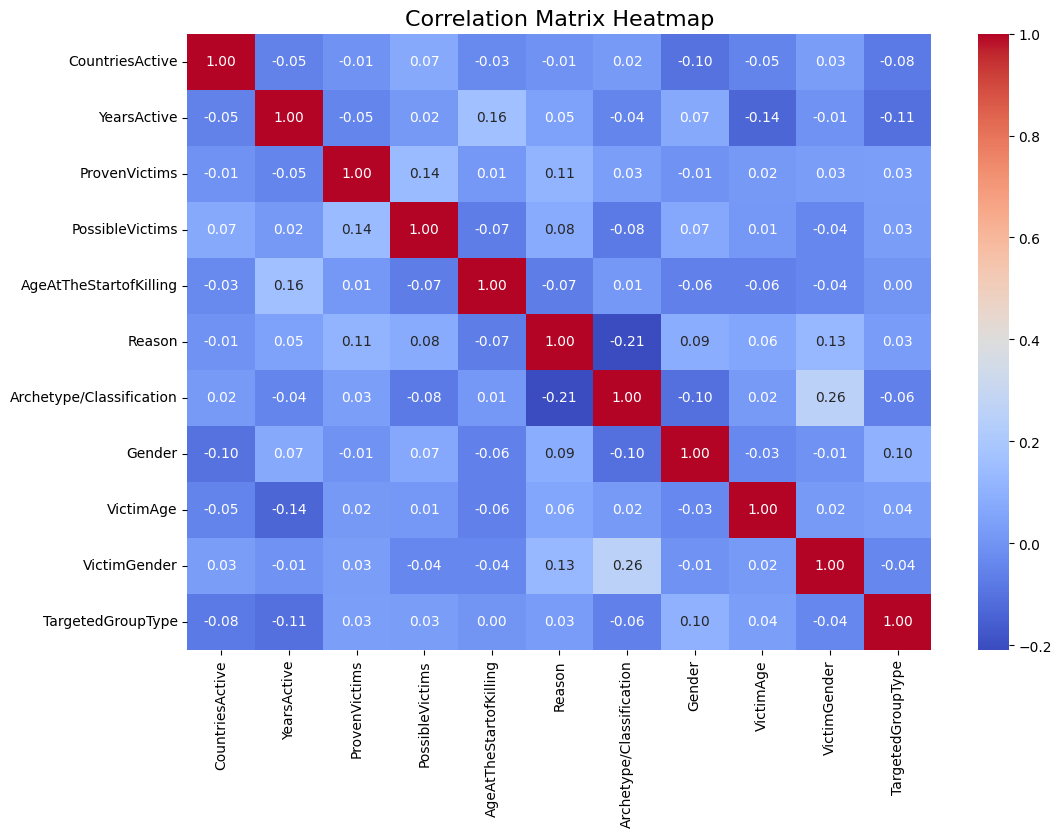

In [58]:
plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, 
            annot=True,        
            fmt=".2f",         
            cmap="coolwarm",  
            cbar=True)         
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [59]:
# Assesing archetypes
unique_archetypes = df['Archetype/Classification'].unique()
print(unique_archetypes)

['Power/Control' 'Mission-Oriented (Hate-Crime/Targeted Groups)'
 'Hedonistic - Lust' 'Hedonistic' 'Power and Hedonistic' 'Visionary'
 'Hedonistic - Thrill' 'Hate Crime' 'Power' 'Profit Killer'
 'Power/Control - Lust']


In [60]:
# Filtering rows where the updated value is 'Hedonistic'
hedonistic_rows = df_copy[df_copy['Archetype/Classification'] == 'Hedonistic']
hedonistic_rows

,Name,Birthday,Countries Active,Years Active,Proven Victims,Possible Victims,BirthYear,StartYear,Age At The Start of Killing,Notes,Type,Nickname,Reason,Archetype/Classification,Gender,Victim Age,Victim Gender,Targeted Group Type
6,Hubert Pilcik,10/14/1891,Czech Republic,1948-1951,5,10,1891.0,1948.0,57.0,Pilcik made money smuggling people across the ...,"Financial Motive, Rapist, Sexual Predator",The Beast,"Financial Gain, Sexual Assault",Hedonistic,Male,Adult,Male,NaN
9,Hubert Pil?„ÂŤ??Â­k,10/14/1891,Czechoslovakia,1948-1951,5,10+,1891.0,1948.0,57.0,Made money smuggling people across the Czechos...,Financial Motive,NaN,Financial Gain,Hedonistic,Male,Adult,Male,NaN
12,Marie Alexandrine Becker,7/14/1879,Belgium,1933-1936,11,NaN,1879.0,1933.0,54.0,Poisoned wealthy clients while working as a se...,Unknown,NaN,Financial Gain,Hedonistic,Male,Adult,Mixed,NaN
16,Elfriede Blauensteiner,1/22/1931,Austria,1981-1995,3,10+,1931.0,1981.0,50.0,Poisoned people for material gain; died from a...,"Financial Motive, Medical",The Black Widow,Financial Gain,Hedonistic,Male,Adult,Mixed,NaN
22,Tamara Samsonova,4/25/1947,Russia,1995-2015,13,13+,1947.0,1995.0,48.0,Killed and allegedly cannibalized people in he...,Cannibal,"Granny Ripper, Baba Yaga",Cannibalism,Hedonistic,Female,Adult,Male,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,Süleyman Aktaş,NaN,Turkey,1986-1994,5,5,NaN,1986.0,NaN,"In 1986, he killed police superintendent Nuri...","Hate Crime, Stangler",The Nailing Killer,Thrill,Hedonistic,Male,Adult,Male,Elderly
635,Valery Asratyan,NaN,Russia,1988-1990,3,3,NaN,1988.0,NaN,During Valery Asratyan's crimes as a serial ki...,"Financial Motive, Rapist, Sexual Predator",The Director,"Financial Gain, Sexual Assault",Hedonistic,Male,Adult,Female,NaN
636,Dmitry Baksheev,NaN,Russia,1999-2017,1,30,NaN,1999.0,NaN,"Dmitry Baksheev, and his wife Natalia Baksheev...",Cannibal,Cannibal Couple,Cannibalism,Hedonistic,Male,Adult,Female,NaN
637,Natalia Baksheev,NaN,Russia,1999-2017,1,30,NaN,1999.0,NaN,"Natalia Baksheev, and her husband Dmitry Baksh...",Cannibal,Cannibal Couple,Cannibalism,Hedonistic,Female,Adult,Female,NaN


In [61]:
# Renaming archetypes to match the 4 relevant types mentioned in our research
df_copy['Archetype/Classification'] = df_copy['Archetype/Classification'].replace('Hedonistic - Lust', 'Hedonistic')
df_copy['Archetype/Classification'] = df_copy['Archetype/Classification'].replace('Hedonistic - Thrill', 'Hedonistic')
df_copy['Archetype/Classification'] = df_copy['Archetype/Classification'].replace('Profit Killer', 'Hedonistic')
df_copy['Archetype/Classification'] = df_copy['Archetype/Classification'].replace('Hate Crime', 'Missionary')
df_copy['Archetype/Classification'] = df_copy['Archetype/Classification'].replace('Mission-Oriented (Hate-Crime/Targeted Groups)', 'Missionary')


# Verifying the change
unique_archetypes = df_copy['Archetype/Classification'].unique()
print(unique_archetypes)


['Power/Control' 'Missionary' 'Hedonistic' 'Power and Hedonistic'
 'Visionary' 'Power' 'Power/Control - Lust']


In [62]:

# Filtering rows where the updated value is 'Hedonistic'
hedonistic_rows = df_copy[df_copy['Archetype/Classification'] == 'Power/Control']
hedonistic_rows

# Remove 'Hate Crime,' from the 'Type' column
df_copy['Type'] = df_copy['Type'].str.replace('Hate Crime, Medical', 'Medical', regex=False).str.strip()

# Verify the change
print(df_copy['Type'].unique())



['Unknown' 'Hate Crime' 'Hate Crime, Rapist, Sexual Predator'
 'Financial Motive, Rapist, Sexual Predator' 'Rapist, Sexual Predator'
 'Financial Motive' 'Torturer'
 'Cannibal, Pedophile, Rapist, Vampire, Cannibal, Torturer, Stalker, Sexual Predator, Vampire'
 'Financial Motive, Medical' 'Rapist, Stalker, Sexual Predator'
 'Rapist, Necrophiliac, Strangler, Sexual Predator'
 'Rapist, Strangler, Sexual Predator' 'Cannibal' 'Hate Crime, Strangler'
 'Rapist, Strangler, Pedophile, Sexual Predator'
 'Rapist, Torturer, Strangler, Sexual Predator' 'Sexual Predator'
 'Rapist, Pedophile, Strangler, Sexual Predator'
 'Financial Motive, Hate Crime' 'Hate Crime, Strangler, Torturer'
 'Financial Motive, Medical, Rapist, Torturer, Sexual Predator'
 'Financial Motive, Rapist, Torturer, Strangler, Sexual Predator'
 'Cannibal, Necrophiliac, Cannibal, Rapist, Sexual Predator'
 'Serial Killer, Rapist, Strangler, Vampire, Sexual Predator, Vampire'
 'Rapist, Torturer, Sexual Predator'
 'Rapist, Torturer, Str

In [63]:
# Count the number of missing (NaN) values in the 'Birthday' column
missing_birthday_count = df['Birthday'].isna().sum()

print(f"Number of missing values in the 'Birthday' column: {missing_birthday_count}")
# Drop rows where 'Birthday' is missing
df_cleaned = df_copy.dropna(subset=['Birthday'])

# Verify the result
print(f"Number of rows after dropping missing birthdays: {len(df_cleaned)}")



Number of missing values in the 'Birthday' column: 100
Number of rows after dropping missing birthdays: 539


In [64]:
# Filter rows where the updated value is 'Hedonistic'
hedonistic_rows = df_copy[df_copy['Archetype/Classification'] == 'Power and Hedonistic']
df_copy['Archetype/Classification'] = df_copy['Archetype/Classification'].replace('Power and Hedonistic', 'Power/Control')
df_copy['Archetype/Classification'] = df_copy['Archetype/Classification'].replace('Power', 'Power/Control')
# Filter rows where the updated value is 'Hedonistic'
hedonistic_rows = df_copy[df_copy['Archetype/Classification'] == 'Visionary']
hedonistic_rows


,Name,Birthday,Countries Active,Years Active,Proven Victims,Possible Victims,BirthYear,StartYear,Age At The Start of Killing,Notes,Type,Nickname,Reason,Archetype/Classification,Gender,Victim Age,Victim Gender,Targeted Group Type
49,L??Â©opold Dion,2/25/1920,Canada,1963,4,4,1920.0,1963.0,43.0,L??Â©opold Dion a Canadian sex offender and se...,Unknown,Monster of Port-Rouge,Mental Illness,Visionary,Male,Adult,Male,NaN
130,John George Haigh,7/24/1909,United Kingdom,1944-1949,6,9,1909.0,1944.0,35.0,Known as the Acid Bath Murderer for dissolving...,Vampire,Acid Bath Murderer,Religious,Visionary,Male,Adult,Mixed,NaN
150,Daniel Blank,6/28/1962,United States,1996-1997,6,6,1962.0,1996.0,34.0,He has a learning disability that hampers his ...,Visionary,NaN,Mental Illness,Visionary,Male,Adult,Mixed,Elderly
310,Robert Rozier,7/28/1955,United States,1981-1986,4,7,1955.0,1981.0,26.0,Rozier was a former American football defensiv...,Unknown,"Neariah Israel, Child of God",Religious,Visionary,Male,Child,Mixed,NaN
320,Herbert Mullin,4/18/1947,United States,1972-1973,13,NaN,1947.0,1972.0,25.0,"Despite detailed confessions, prosecutors deci...",Unknown,The Psychopath of Santa Cruz,Mental Illness,Visionary,Male,Adult,Male,NaN
387,Aaron Kosminski,9/11/1865,United Kingdom,1888-1891,5,11,1865.0,1888.0,23.0,Aaron Kosminski (Aron Mordke Kozmi?…Â„ski) a s...,Unknown,Jack the Ripper (possible),Mental Illness,Visionary,Male,Adult,Mixed,NaN
538,Nikolay Shubin,NaN,Russia,2004-2006,13,NaN,1956.0,2004.0,48.0,Paranoid schizophrenic who killed people who b...,Unknown,NaN,Mental Illness,Visionary,Male,Adult,Male,NaN
573,Tomas Maldonado Cera,NaN,Colombia,2002-2018,7,10,1971.0,2002.0,31.0,Killed people in Barranquila for the purpose o...,Unknown,The Satanist,Occult Ritual,Visionary,Male,Adult,Mixed,NaN


In [65]:

# Verify the change
unique_archetypes = df_copy['Archetype/Classification'].unique()
print(unique_archetypes)
hedonistic_rows = df_copy[df_copy['Archetype/Classification'] == 'Power/Control - Lust']
hedonistic_rows
df_copy['Archetype/Classification'] = df_copy['Archetype/Classification'].replace('Power/Control - Lust', 'Power/Control')
# Verify the change
unique_archetypes = df_copy['Archetype/Classification'].unique()
print(unique_archetypes)



['Power/Control' 'Missionary' 'Hedonistic' 'Visionary'
 'Power/Control - Lust']
['Power/Control' 'Missionary' 'Hedonistic' 'Visionary']


#### Random Forest

Random Forest is an algorythm used for classification and regression tasks. It handles both numerical and categorical data, fitting our dataset best. We decided it would work best when classifying serial killers into predefined archetypes accurately.

In [66]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Preparing the data
# Encoding the target column (Archetype/Classification) and features
df_encoded = df_copy.copy()

# Label encoding categorical columns (features)
label_encoder = LabelEncoder()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

# Defining the features (X) and target variable (y)
X = df_encoded.drop(columns=['Archetype/Classification'])  
y = df_encoded['Archetype/Classification']  

# Splitting the data into train (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting temp into test (10%) and validation (10%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Checking the sizes of the splits
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))
print("Validation set size:", len(X_val))

# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Tracking the accuracy
num_trees = [10, 50, 100, 200]  # Number of trees in each iteration
train_accuracies = []
test_accuracies = []

# Training loop
for n in num_trees:
    print(f"\nTraining Random Forest with {n} trees...")
    
    # Updating the model with the current number of trees
    rf_model.set_params(n_estimators=n)
    
    # Training the model
    rf_model.fit(X_train, y_train)
    
    # Predicting on the training set and test set
    train_predictions = rf_model.predict(X_train)
    test_predictions = rf_model.predict(X_test)
    
    # Calculating accuracy
    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)
    
    # Saving the accuracies
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"Train Accuracy: {train_acc:.2f}")
    print(f"Test Accuracy: {test_acc:.2f}")

# Predicting on the validation set
validation_predictions = rf_model.predict(X_val)

# Calculating accuracy
validation_accuracy = accuracy_score(y_val, validation_predictions)
print(f"\nFinal Validation Accuracy: {validation_accuracy:.2f}")

Training set size: 511
Testing set size: 64
Validation set size: 64

Training Random Forest with 10 trees...
Train Accuracy: 0.99
Test Accuracy: 0.95

Training Random Forest with 50 trees...
Train Accuracy: 1.00
Test Accuracy: 0.98

Training Random Forest with 100 trees...
Train Accuracy: 1.00
Test Accuracy: 0.98

Training Random Forest with 200 trees...
Train Accuracy: 1.00
Test Accuracy: 0.98

Final Validation Accuracy: 0.98


### Gradient Boosted Tree

In [67]:
# Preparing the data
# Encoding the target column (Archetype/Classification) and features
df_encode_GB = df_copy.copy()

# Label encoding categorical columns (features)
label_encoder = LabelEncoder()
for column in df_encode_GB.select_dtypes(include=['object']).columns:
    df_encode_GB[column] = label_encoder.fit_transform(df_encode_GB[column].astype(str))

# Dropping the 'Victim Age' column as it does not contribute to model performance
df_encode_GB = df_encode_GB.drop(columns=['Victim Age'])

# Defining the features (X) and target variable (y)
X_GB = df_encode_GB.drop(columns=['Archetype/Classification'])  
y_GB = df_encode_GB['Archetype/Classification']  

# Splitting the data into train (80%) and temp (20%)
X_train_GB, X_temp_GB, y_train_GB, y_temp_GB = train_test_split(X_GB, y_GB, test_size=0.2, random_state=42)

# Splitting temp into test (10%) and validation (10%)
X_test_GB, X_val_GB, y_test_GB, y_val_GB = train_test_split(X_temp_GB, y_temp_GB, test_size=0.5, random_state=42)

# Checking the sizes of the splits
print("Training set size:", len(X_train_GB))
print("Testing set size:", len(X_test_GB))
print("Validation set size:", len(X_val_GB))

warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")


# Initializing the Gradient Boosted Tree model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Tracking the accuracy
learning_rates = [0.01, 0.1, 0.2, 0.3]  # Different learning rates
train_accuracies = []
test_accuracies = []

# Training loop
for lr in learning_rates:
    print(f"\nTraining Gradient Boosted Tree with learning rate {lr}...")
    
    # Updating the model with the current learning rate
    xgb_model.set_params(learning_rate=lr)
    
    # Training the model
    xgb_model.fit(X_train_GB, y_train_GB)   
    
    # Predicting on the training set and test set
    train_predictions = xgb_model.predict(X_train_GB)
    test_predictions = xgb_model.predict(X_test_GB)
    
    # Calculating accuracy
    train_acc_GB = accuracy_score(y_train_GB, train_predictions)
    test_acc_GB = accuracy_score(y_test_GB, test_predictions)
    
    # Saving the accuracies
    train_accuracies.append(train_acc_GB)
    test_accuracies.append(test_acc_GB)
    
    print(f"Train Accuracy: {train_acc_GB:.2f}")
    print(f"Test Accuracy: {test_acc_GB:.2f}")

# Predicting on the validation set
validation_predictions_GB = xgb_model.predict(X_val_GB)

# Calculating accuracy
validation_accuracy_GB = accuracy_score(y_val_GB, validation_predictions_GB)
print(f"\nFinal Validation Accuracy: {validation_accuracy_GB:.2f}")

# Analyzing feature importance
importances_GB = xgb_model.feature_importances_
feature_importance_GB = sorted(zip(X_GB.columns, importances_GB), key=lambda x_GB: x_GB[1], reverse=True)

print("\nFeature Importance:")
for feature_GB, importance_GB in feature_importance_GB:
    print(f"{feature_GB}: {importance_GB:.4f}")


Training set size: 511
Testing set size: 64
Validation set size: 64

Training Gradient Boosted Tree with learning rate 0.01...
Train Accuracy: 0.98
Test Accuracy: 0.98

Training Gradient Boosted Tree with learning rate 0.1...
Train Accuracy: 1.00
Test Accuracy: 0.98

Training Gradient Boosted Tree with learning rate 0.2...
Train Accuracy: 1.00
Test Accuracy: 0.98

Training Gradient Boosted Tree with learning rate 0.3...
Train Accuracy: 1.00
Test Accuracy: 0.98

Final Validation Accuracy: 0.97

Feature Importance:
Type: 0.5395
Reason: 0.2196
Age At The Start of Killing: 0.0360
Targeted Group Type: 0.0309
Gender: 0.0257
Years Active: 0.0244
Countries Active: 0.0181
Name: 0.0176
BirthYear: 0.0170
Birthday: 0.0148
Possible Victims: 0.0141
Notes: 0.0131
StartYear: 0.0105
Proven Victims: 0.0078
Nickname: 0.0062
Victim Gender: 0.0047


In [72]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Setting up the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fitting the model
grid_search.fit(X_train_GB, y_train_GB)

# Best parameters and best score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluating the best model on the validation set
best_model_GB = grid_search.best_estimator_
validation_predictions_GB = best_model_GB.predict(X_val_GB)
validation_accuracy_GB = accuracy_score(y_val_GB, validation_predictions_GB)
print(f"\nFinal Validation Accuracy: {validation_accuracy_GB:.2f}")

# Analyzing feature importance
importances_GB = best_model_GB.feature_importances_
feature_importance_GB = sorted(zip(X_GB.columns, importances_GB), key=lambda x_GB: x_GB[1], reverse=True)

print("\nFeature Importance:")
for feature_GB, importance_GB in feature_importance_GB:
    print(f"{feature_GB}: {importance_GB:.4f}")

Fitting 3 folds for each of 144 candidates, totalling 432 fits

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.9745786033711731

Final Validation Accuracy: 0.98

Feature Importance:
Type: 0.4607
Reason: 0.2627
Targeted Group Type: 0.0293
StartYear: 0.0284
Years Active: 0.0281
Age At The Start of Killing: 0.0275
BirthYear: 0.0270
Name: 0.0207
Birthday: 0.0202
Countries Active: 0.0193
Gender: 0.0179
Proven Victims: 0.0160
Possible Victims: 0.0126
Victim Gender: 0.0113
Notes: 0.0111
Nickname: 0.0072


c:\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [73]:

# Suppressing specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

# Evaluating the model on the test set
test_predictions_GB = best_model_GB.predict(X_test_GB)
test_accuracy_GB = accuracy_score(y_test_GB, test_predictions_GB)
print(f"\nFinal Test Accuracy: {test_accuracy_GB:.2f}")

# Error Analysis
print("\nClassification Report:")
print(classification_report(y_test_GB, test_predictions_GB))

# Extracting feature names from feature_importance
features_GB = [feature_GB for feature_GB, importance_GB in feature_importance_GB]

# Summary of Findings
summary_GB = f'''
Model Performance Summary:
- Best Hyperparameters: {grid_search.best_params_}
- Validation Accuracy: {validation_accuracy_GB:.2f}
- Test Accuracy: {test_accuracy_GB:.2f}

Error Analysis:
- See Classification Report and Confusion Matrix for detailed insights.

Feature Importance:
- Top Features:
  {', '.join(features_GB[:5])}
'''
print(summary_GB)



Final Test Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       1.00      1.00      1.00         2
           2       0.96      1.00      0.98        27

    accuracy                           0.98        64
   macro avg       0.99      0.99      0.99        64
weighted avg       0.98      0.98      0.98        64


Model Performance Summary:
- Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
- Validation Accuracy: 0.98
- Test Accuracy: 0.98

Error Analysis:
- See Classification Report and Confusion Matrix for detailed insights.

Feature Importance:
- Top Features:
  Type, Reason, Targeted Group Type, StartYear, Years Active



Unique classes: 4
y_train_nn shape: (511, 4)
y_test_nn shape: (64, 4)
y_val_nn shape: (64, 4)
Epoch 1/50


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4575 - loss: 1.3810 - val_accuracy: 0.5469 - val_loss: 1.3459
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4724 - loss: 1.3357 - val_accuracy: 0.5469 - val_loss: 1.2992
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5465 - loss: 1.2875 - val_accuracy: 0.5469 - val_loss: 1.2431
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: 1.2302 - val_accuracy: 0.5469 - val_loss: 1.1797
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5341 - loss: 1.1699 - val_accuracy: 0.5469 - val_loss: 1.1144
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5231 - loss: 1.0888 - val_accuracy: 0.5469 - val_loss: 1.0514
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5522 - loss: 1.0310 - val_accuracy: 0.5469 - val_loss: 0.9979
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5081 - loss: 0.9901 - val_accuracy: 0.5469 - val_loss: 0.9590
Ep

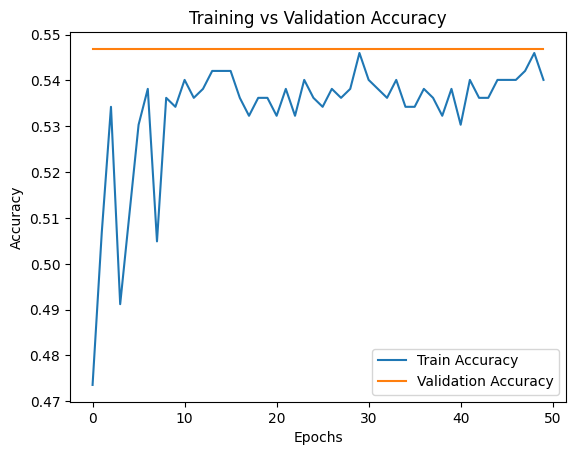

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Random Forest Test Accuracy: 0.98


In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import numpy as np



X_nn = df_encoded.drop(columns=['Archetype/Classification'])  
y_nn = df_encoded['Archetype/Classification'] 

# Preparing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_nn)

# Splitting the data into training, testing, and validation
X_train_nn, X_temp_nn, y_train_nn, y_temp_nn = train_test_split(X_scaled, y_nn, test_size=0.2, random_state=42, stratify=y_nn)
X_test_nn, X_val_nn, y_test_nn, y_val_nn = train_test_split(X_temp_nn, y_temp_nn, test_size=0.5, random_state=42, stratify=y_temp_nn)

# Encoding target variable into categorical format
y_train_nn = np.array(pd.get_dummies(y_train_nn))
y_test_nn = np.array(pd.get_dummies(y_test_nn))
y_val_nn = np.array(pd.get_dummies(y_val_nn))

print("Unique classes:", len(np.unique(df_encoded['Archetype/Classification'])))
print("y_train_nn shape:", y_train_nn.shape)
print("y_test_nn shape:", y_test_nn.shape)
print("y_val_nn shape:", y_val_nn.shape)

# Building the network

def create_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential([
        Dense(128, input_dim=X_train_nn.shape[1], activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(y_train_nn.shape[1], activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Initializing and training the model
nn_model = create_model(learning_rate=0.001, dropout_rate=0.3)

history = nn_model.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=50,
    batch_size=32,
    verbose=1
)


# Evaluating the model on the test set
test_loss, test_accuracy = nn_model.evaluate(X_test_nn, y_test_nn, verbose=0)
print(f"\nNeural Network Test Accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Analyzing Results

# Comparing the performance of the Neural Network and Random Forest
rf_test_predictions = rf_model.predict(X_test)
nn_test_predictions = np.argmax(nn_model.predict(X_test_nn), axis=1)

rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.2f}")
